In [4]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from spacy import displacy
import spacy

### Uploading Diagnoses_icd

In [ ]:
diagnoses_icd_df = pd.read_csv('DIAGNOSES_ICD.csv.gz', compression="gzip")
diagnoses_icd_df.info()
diagnoses_icd_df.iloc[0]
print(diagnoses_icd_df.iloc[0])
print(diagnoses_icd_df.columns)
print(len(diagnoses_icd_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      651047 non-null  int64  
 1   SUBJECT_ID  651047 non-null  int64  
 2   HADM_ID     651047 non-null  int64  
 3   SEQ_NUM     651000 non-null  float64
 4   ICD9_CODE   651000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB
ROW_ID          1297
SUBJECT_ID       109
HADM_ID       172335
SEQ_NUM          1.0
ICD9_CODE      40301
Name: 0, dtype: object
Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE'], dtype='object')
651047


In [10]:
arr_subject_id=[]
arr_hadm_id=[]
arr_icd9_code=[]
for row in range(0, len(diagnoses_icd_df)):
  if(diagnoses_icd_df.loc[row, 'ICD9_CODE'] in ['4019', '42731', '4280', '41401', '5849']):
    arr_subject_id.append(diagnoses_icd_df.loc[row, 'SUBJECT_ID'])
    arr_hadm_id.append(diagnoses_icd_df.loc[row, 'HADM_ID'])
    arr_icd9_code.append(diagnoses_icd_df.loc[row, 'ICD9_CODE'])

    # print(diagnoses_icd_df.loc[row, 'SUBJECT_ID'])
print('length of array is:',len(arr_subject_id))

length of array is: 68253


In [11]:
print('length of array is:',len(arr_hadm_id))

length of array is: 68253


### Opening notevents_df

In [5]:
# read the uploaded file in a dataframe
noteevents_df = pd.read_csv('NOTEEVENTS.csv.gz', compression="gzip")

/var/folders/4v/np_9tc295nv6q1gh0_nypyfh0000gn/T/ipykernel_70461/2669680515.py:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  noteevents_df = pd.read_csv('NOTEEVENTS.csv.gz', compression="gzip")


In [13]:
noteevents_df.shape

(2083180, 11)

In [11]:
noteevents_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [12]:
noteevents_df['TEXT'].iloc[0]

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [13]:
noteevents_df.info()
noteevents_df.iloc[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB


ROW_ID                                                       174
SUBJECT_ID                                                 22532
HADM_ID                                                 167853.0
CHARTDATE                                             2151-08-04
CHARTTIME                                                    NaN
STORETIME                                                    NaN
CATEGORY                                       Discharge summary
DESCRIPTION                                               Report
CGID                                                         NaN
ISERROR                                                      NaN
TEXT           Admission Date:  [**2151-7-16**]       Dischar...
Name: 0, dtype: object

### Filter the data in files to create a new relevant dataframe

In [14]:
icd9_430_patients_discharge_summary_df = pd.DataFrame(columns=['SUBJECT_ID', 'CATEGORY', 'TEXT',"ICD_9_CODE"])
patients_dict = {"SUBJECT_ID":[],"CATEGORY":[],"TEXT":[],"ICD_9_CODE":[]}

In [16]:
# Convert arrays to sets for faster lookup
subject_id_set = set(arr_subject_id)
hadm_id_set = set(arr_hadm_id)

# Filter noteevents using vectorized operations
filtered_notes = noteevents_df[
    (noteevents_df['SUBJECT_ID'].isin(subject_id_set)) &
    (noteevents_df['HADM_ID'].isin(hadm_id_set)) &
    (noteevents_df['CATEGORY'] == 'Discharge summary')
].copy()

# Create a mapping of (subject_id, hadm_id) to ICD9_CODE
icd_mapping = diagnoses_icd_df.set_index(['SUBJECT_ID', 'HADM_ID'])['ICD9_CODE'].to_dict()

# Apply the mapping to get ICD codes (assuming the first code per admission)
filtered_notes['ICD_9_CODE'] = filtered_notes.apply(
    lambda row: icd_mapping.get((row['SUBJECT_ID'], row['HADM_ID'])), axis=1
)

# Convert to dictionary format if needed
patients_dict = {
    "SUBJECT_ID": filtered_notes['SUBJECT_ID'].tolist(),
    "CATEGORY": filtered_notes['CATEGORY'].tolist(),
    "TEXT": filtered_notes['TEXT'].tolist(),
    "ICD_9_CODE": filtered_notes['ICD_9_CODE'].tolist()
}

In [17]:
patients_df = pd.DataFrame(patients_dict)

In [18]:
patients_df.to_csv("Icd9codes_discharge_summary.csv")

### Download the created dataframe (whole or a part of it)

In [20]:
#if you using Macbook or Linux based systems download the patients_df dataframe in .csv format
patients_df.to_csv(r'ICD9-430_Patients_DischargeSummary.csv', index = False)
# if you want to download only the top 10 of the patients_df dataframe rows as a csv file do the following
patients_df[:10].to_csv(r'ICD9-430_Patients_DischargeSummary.csv', index = False)

### Using scipy on noteevents

In [2]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.2 MB/s eta 0:00:00 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser", "tagger", "lemmatizer"]) # Keep only tokenizer (disable unnecessary components for faster processing)
nlp.max_length = 2000000  # Increase max text length if needed

In [5]:
noteevents_text = noteevents_df['TEXT']

In [6]:
tokens = nlp(noteevents_text[0])
for token in tokens:
    print(token.text, token.pos_, token.dep_)

Admission  
Date  
:  
  SPACE 
[  
*  
*  
2151  
-  
7  
-  
16  
*  
*  
]  
       SPACE 
Discharge  
Date  
:  
  SPACE 
[  
*  
*  
2151  
-  
8  
-  
4  
*  
*  
]  



 SPACE 
Service  
:  

 SPACE 
ADDENDUM  
:  


 SPACE 
RADIOLOGIC  
STUDIES  
:  
  SPACE 
Radiologic  
studies  
also  
included  
a  
chest  

 SPACE 
CT  
,  
which  
confirmed  
cavitary  
lesions  
in  
the  
left  
lung  
apex  

 SPACE 
consistent  
with  
infectious  
process  
/  
tuberculosis  
.  
  SPACE 
This  
also  

 SPACE 
moderate  
-  
sized  
left  
pleural  
effusion  
.  


 SPACE 
HEAD  
CT  
:  
  SPACE 
Head  
CT  
showed  
no  
intracranial  
hemorrhage  
or  
mass  

 SPACE 
effect  
,  
but  
old  
infarction  
consistent  
with  
past  
medical  

 SPACE 
history  
.  


 SPACE 
ABDOMINAL  
CT  
:  
  SPACE 
Abdominal  
CT  
showed  
lesions  
of  

 SPACE 
T10  
and  
sacrum  
most  
likely  
secondary  
to  
osteoporosis  
.  
These  
can  

 SPACE 
be  
followed  
by  
repeat  
im

### tokenizing all text rows
we can do what was given in the tutorial but it will be very slow code since noteevents is a large dataframe, so we will perform multi threading to make this process faster.
because of time constraints, im only going to use the first 10k rows

In [10]:
from tqdm import tqdm

token_without_punct = []
for i in tqdm(range(len(noteevents_text[:10000])), desc="Processing documents"):
    doc = nlp(noteevents_text[i])
    token_without_punct.append([token.orth_ for token in doc if not (token.is_punct or token.is_space)])

Processing documents: 100%|██████████| 10000/10000 [13:55<00:00, 11.96it/s]


In [11]:
len(token_without_punct)

10000

In [16]:
# Save the tokenized data to a CSV file
token_without_punct_df = pd.DataFrame(token_without_punct)
token_without_punct_df.to_csv('token_without_punct.csv', index=False)

### limiting our anlysis to 60 notes because of time contraints

### step 1: POS Tagging

In [17]:
token_without_punct = token_without_punct[:60]

In [ ]:
tokens_with_pos = []
for i in tqdm(range(len(noteevents_text[:60])), desc="POS Tagging"):
    doc = nlp(noteevents_text[i])
    # Extract tokens with their POS tags
    tokens_with_pos.append([(token.text, token.pos_, token.tag_) for token in doc 
                           if not (token.is_punct or token.is_space)])

print("\nSample POS tagging output:")
for token, pos, detailed_tag in tokens_with_pos[0][:15]:  # First 15 tokens of first document
    print(f"{token:<15} {pos:<6} {detailed_tag}")


POS Tagging: 100%|██████████| 60/60 [00:04<00:00, 12.69it/s]


Sample POS tagging output:
Admission       PROPN  NNP
Date            PROPN  NNP
2151            NUM    CD
7               NUM    CD
16              NUM    CD
Discharge       PROPN  NNP
Date            PROPN  NNP
2151            NUM    CD
8               NUM    CD
4               NUM    CD
Service         PROPN  NNP
ADDENDUM        PROPN  NNP
RADIOLOGIC      PROPN  NNP
STUDIES         NOUN   NNS
Radiologic      ADJ    JJ


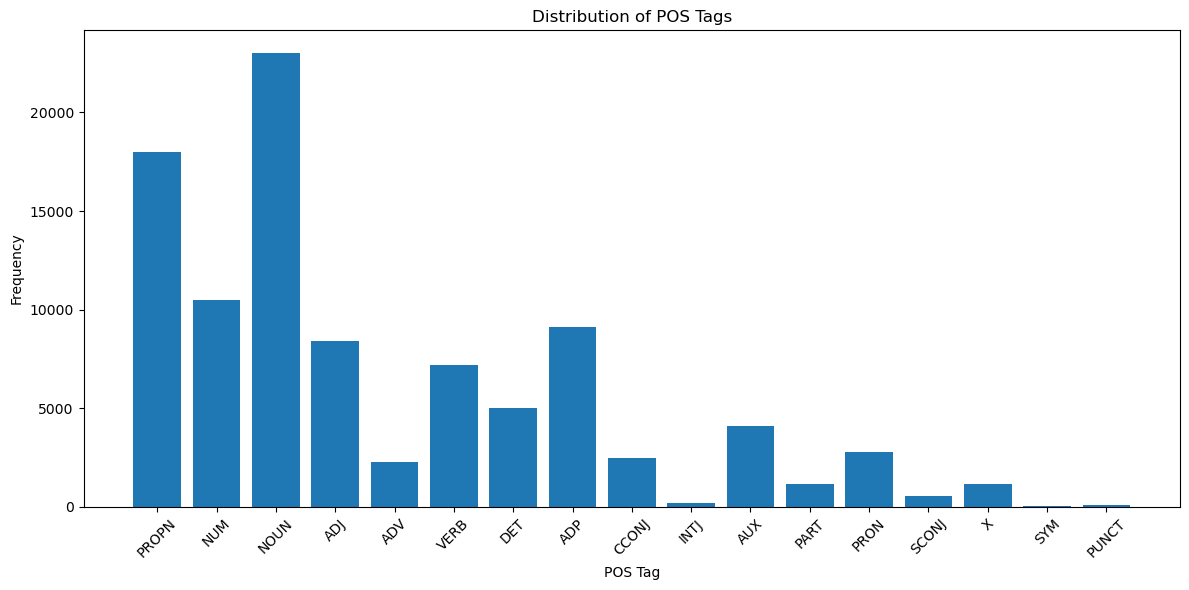

In [ ]:
all_pos_tags = []
for doc_tags in tokens_with_pos:
    all_pos_tags.extend([pos for _, pos, _ in doc_tags])

# Get the counts
pos_counts = Counter(all_pos_tags)

plt.figure(figsize=(12, 6))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title('Distribution of POS Tags')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### step 2: Name entities

In [24]:
all_entities = []
entity_texts = []

for i in tqdm(range(len(noteevents_text[:60])), desc="Extracting Named Entities"):
    # Process the original text, not the already tokenized version
    doc = nlp(noteevents_text[i])
    
    # Get entities from this document
    doc_entities = [(ent.text, ent.label_) for ent in doc.ents]
    all_entities.append(doc_entities)
    
    # Add to flat list for overall statistics
    entity_texts.extend(doc_entities)

# Show sample of entities found
if all_entities and all_entities[0]:
    print("\nSample entities from first document:")
    for text, label in all_entities[0][:15]:
        print(f"{text:<30} {label}")
else:
    print("No entities found in the first document.")

# Count entity types
if entity_texts:
    entity_counts = Counter([label for _, label in entity_texts])

    # Plot entity type distribution
    plt.figure(figsize=(12, 6))
    plt.bar(entity_counts.keys(), entity_counts.values())
    plt.title('Distribution of Named Entity Types')
    plt.xlabel('Entity Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No entities found across all documents.")

Extracting Named Entities: 100%|██████████| 60/60 [00:04<00:00, 12.36it/s]

No entities found in the first document.
No entities found across all documents.


### testing on different rows since we did not find any name entites in the first try

In [25]:
all_entities = []
entity_texts = []

for i in tqdm(range(len(noteevents_text[100:150])), desc="Extracting Named Entities"):
    # Process the original text, not the already tokenized version
    doc = nlp(noteevents_text[i])
    
    # Get entities from this document
    doc_entities = [(ent.text, ent.label_) for ent in doc.ents]
    all_entities.append(doc_entities)
    
    # Add to flat list for overall statistics
    entity_texts.extend(doc_entities)

# Show sample of entities found
if all_entities and all_entities[0]:
    print("\nSample entities from first document:")
    for text, label in all_entities[0][:15]:
        print(f"{text:<30} {label}")
else:
    print("No entities found in the first document.")

# Count entity types
if entity_texts:
    entity_counts = Counter([label for _, label in entity_texts])

    # Plot entity type distribution
    plt.figure(figsize=(12, 6))
    plt.bar(entity_counts.keys(), entity_counts.values())
    plt.title('Distribution of Named Entity Types')
    plt.xlabel('Entity Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No entities found across all documents.")

Extracting Named Entities: 100%|██████████| 50/50 [00:04<00:00, 11.98it/s]

No entities found in the first document.
No entities found across all documents.


### step 3 entity visualizer

In [ ]:
import spacy
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import random
from IPython.display import display, HTML

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Make sure NER is enabled
if "ner" in nlp.disabled:
    nlp.enable_pipe("ner")

# Process a sample of documents
num_docs = min(60, len(noteevents_text))
sample_docs = []
sample_ents = []

for i in tqdm(range(num_docs), desc="Processing for visualization"):
    # Process text with spaCy
    doc = nlp(noteevents_text[i])
    
    # Store document and its entities
    if len(doc.ents) > 0:  # Only store docs with entities
        sample_docs.append(doc)
        sample_ents.extend([(ent.text, ent.label_) for ent in doc.ents])

# Function to visualize entities in a specific document
def visualize_entities(doc_idx=0):
    if not sample_docs:
        return HTML("<p>No documents with entities found</p>")
    
    doc = sample_docs[doc_idx]
    html = displacy.render(doc, style="ent", jupyter=True, options={"colors": {}})
    return HTML(html)

# Function to show entity distribution as a DataFrame
def entity_distribution():
    if not sample_ents:
        return pd.DataFrame()
    
    ent_df = pd.DataFrame(sample_ents, columns=["Entity", "Type"])
    return ent_df.groupby("Type").count().sort_values("Entity", ascending=False)

# Create a color map for entity types
def generate_entity_colors():
    if not sample_ents:
        return {}
    
    entity_types = set([ent_type for _, ent_type in sample_ents])
    colors = {}
    
    for ent_type in entity_types:
        # Generate random colors for each entity type
        r = random.randint(100, 200)
        g = random.randint(100, 200)
        b = random.randint(100, 200)
        colors[ent_type] = f"#{r:02x}{g:02x}{b:02x}"
    
    return colors

# Create and display the entity visualization for a random document with entities
if sample_docs:
    # Set custom colors
    colors = generate_entity_colors()
    options = {"colors": colors}
    
    # Choose a document with a good number of entities
    doc_lengths = [(i, len(doc.ents)) for i, doc in enumerate(sample_docs)]
    doc_lengths.sort(key=lambda x: x[1], reverse=True)
    
    if doc_lengths:
        best_doc_idx = doc_lengths[0][0]  # Document with most entities
        
        # Display the visualization
        display(HTML("<h3>Named Entity Visualization</h3>"))
        html = displacy.render(sample_docs[best_doc_idx], style="ent", options=options)
        display(HTML(html))
        
        # Show entity distribution
        dist_df = entity_distribution()
        display(HTML("<h3>Entity Type Distribution</h3>"))
        display(dist_df)
else:
    display(HTML("<p>No entities found in the processed documents</p>"))

# Function to get a sample of each entity type
def entity_samples():
    if not sample_ents:
        return pd.DataFrame()
    
    samples = {}
    for text, label in sample_ents:
        if label not in samples:
            samples[label] = [text]
        elif len(samples[label]) < 5:  # Get up to 5 examples per type
            samples[label].append(text)
    
    result = []
    for label, examples in samples.items():
        result.append({
            "Entity Type": label,
            "Examples": ", ".join(examples)
        })
    
    return pd.DataFrame(result)

# Display entity samples
if sample_ents:
    display(HTML("<h3>Examples of Each Entity Type</h3>"))
    samples_df = entity_samples()
    display(samples_df)

Processing for visualization: 100%|██████████| 60/60 [00:11<00:00,  5.42it/s]


<IPython.core.display.HTML object>

,Entity
Type,
CARDINAL,5401
ORG,3163
DATE,2183
PERSON,980
GPE,471
TIME,299
PERCENT,233
PRODUCT,174
ORDINAL,145


,Entity Type,Examples
0,ORG,"Admission Date: , CT, CT, T10, Admission Date:"
1,DATE,"2151-7-16, 2151-8-4, 1775, 1776, 1807"
2,PERSON,"Radiologic, emphysema, O2, CVA, Synthroid"
3,ORDINAL,"First, First, First, First, First"
4,GPE,"M.D., MD, FEV1, Angina, q.d.\n"
5,CARDINAL,"2118-6-2, 2118-6-14, 18, 125, 1"
6,PERCENT,"90%, 100%, 52%, 54%, 23%"
7,TIME,"night, four minutes, approximately one hour, o..."
8,PRODUCT,"Cranial, Cepacol, Fluticasone 110 mcg two, Lor..."
9,WORK_OF_ART,"History of Present Illness, Aerosol, Spray Sig..."


### Using scispacy for specialized text analysis
create entity visualizers using both the basic scientific model and the specialized biomedical NER model. 


In [ ]:
nlp = spacy.load("en_core_sci_md")
ruler = nlp.add_pipe("entity_ruler")


In [28]:
# model en_core_sci_md
! pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_md-0.5.4.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 MB 23.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.7.5-cp39-cp39-macosx_11_0_arm64.whl.metadata (27 kB)
  Using cached thinc-8.2.5-cp39-cp39-macosx_11_0_arm64.whl.metadata (15 kB)
  Using cached blis-0.7.11-cp39-cp39-macosx_11_0_arm64.whl.metadata (7.4 kB)
  Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached spacy-3.7.5-cp39-cp39-macosx_11_0_arm64.whl (6.6 MB)
Using cached thinc-8.2.5-cp39-cp39-macosx_11_0_arm64.whl (780 kB)
Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl (14.0 MB)
Using cached blis-0.7.11-cp39-cp39-macosx_11_0_arm64.whl (1.1 MB)
  Created wheel for en_core_sci_md: filename=en_core_sci_md-0.5.4-py3-none-any.whl size=119157959 sha256=a7131326e1c2a65f4a6e3d365d0d56e20d398e4bdccbc67f8d4e7b3b94c7cc6e
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/7a/54/c4/ec772aa6ab1b5f1de6708041091c31ea8cbbfc331f203

In [29]:
# model: en_ner_bc5cdr_md
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 23.2 MB/s eta 0:00:00m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
  Created wheel for en_ner_bc5cdr_md: filename=en_ner_bc5cdr_md-0.5.4-py3-none-any.whl size=119787717 sha256=fe951154ff9501682289f469fb1b8d691f118eaba05f623282a98d3b50d10655
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/5e/28/69/338ab4a7f1ebd51895058e69c44704521d29a53f28db8ca19f
Successfully built en_ner_bc5cdr_md


In [10]:
# Import necessary libraries
import spacy
import en_ner_bc5cdr_md
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load the model
nlp = en_ner_bc5cdr_md.load()

# Assuming you have a dataframe called 'df' with a column 'noteevents_text'
# Initialize counters and containers
all_entities = []
entity_types = []
entity_counts = Counter()
docs_with_entities = 0
entity_by_note = []

# Process the first 60 rows
for i in range(min(60, len(noteevents_df['TEXT']))):
    # Convert the Series element to a string before processing
    text = str(noteevents_df['TEXT'].iloc[i])
    doc = nlp(text)
    
    # Track if this document has any entities
    note_has_entities = False
    note_entities = []
    
    for ent in doc.ents:
        # Add to overall collection
        all_entities.append((ent.text, ent.label_))
        entity_types.append(ent.label_)
        entity_counts[ent.text] += 1
        note_has_entities = True
        note_entities.append((ent.text, ent.label_))
    
    if note_has_entities:
        docs_with_entities += 1
    
    entity_by_note.append(note_entities)

# Calculate summary statistics
most_common_entities = entity_counts.most_common(20)
entity_type_counts = Counter(entity_types)
most_common_types = entity_type_counts.most_common()

# Print summary report
print(f"Summary of Biomedical Named Entity Recognition on 60 Notes")
print(f"=====================================================")
print(f"Total entities found: {len(all_entities)}")
print(f"Number of unique entities: {len(entity_counts)}")
print(f"Number of notes containing entities: {docs_with_entities} out of 60 ({docs_with_entities/60*100:.1f}%)")
print(f"\nEntity type distribution:")
for entity_type, count in most_common_types:
    print(f"  - {entity_type}: {count} ({count/len(entity_types)*100:.1f}%)")

print(f"\nTop 20 most common entities:")
for entity, count in most_common_entities:
    print(f"  - '{entity}' ({most_common_types[0][0]}): {count} occurrences")

print(f"\nDistribution of entities per note:")
entities_per_note = [len(note) for note in entity_by_note]
entity_distribution = Counter(entities_per_note)
for count, frequency in sorted(entity_distribution.items()):
    print(f"  - Notes with {count} entities: {frequency}")

Summary of Biomedical Named Entity Recognition on 60 Notes
Total entities found: 6332
Number of unique entities: 1851
Number of notes containing entities: 60 out of 60 (100.0%)

Entity type distribution:
  - DISEASE: 3750 (59.2%)
  - CHEMICAL: 2582 (40.8%)

Top 20 most common entities:
  - 'pain' (DISEASE): 149 occurrences
  - 'Pt' (DISEASE): 72 occurrences
  - 'chest pain' (DISEASE): 63 occurrences
  - 'pneumonia' (DISEASE): 58 occurrences
  - 'edema' (DISEASE): 52 occurrences
  - 'Allergies' (DISEASE): 52 occurrences
  - 'shortness of breath' (DISEASE): 51 occurrences
  - 'oxygen' (DISEASE): 44 occurrences
  - 'lasix' (DISEASE): 43 occurrences
  - 'PCP' (DISEASE): 43 occurrences
  - 'Hypertension' (DISEASE): 42 occurrences
  - 'CHF' (DISEASE): 42 occurrences
  - 'hypotension' (DISEASE): 42 occurrences
  - 'hypertension' (DISEASE): 42 occurrences
  - 'cough' (DISEASE): 41 occurrences
  - 'Q6H' (DISEASE): 35 occurrences
  - 'fracture' (DISEASE): 35 occurrences
  - 'Lasix' (DISEASE): 34

Processing notes and extracting medical entities...
Found 1583 unique medical entities in the notes
Training Word2Vec model...
Model trained with vocabulary size: 6840
Number of medical entities in model vocabulary: 887
Limiting visualization to 50 entities (out of 887)
Creating t-SNE visualization...


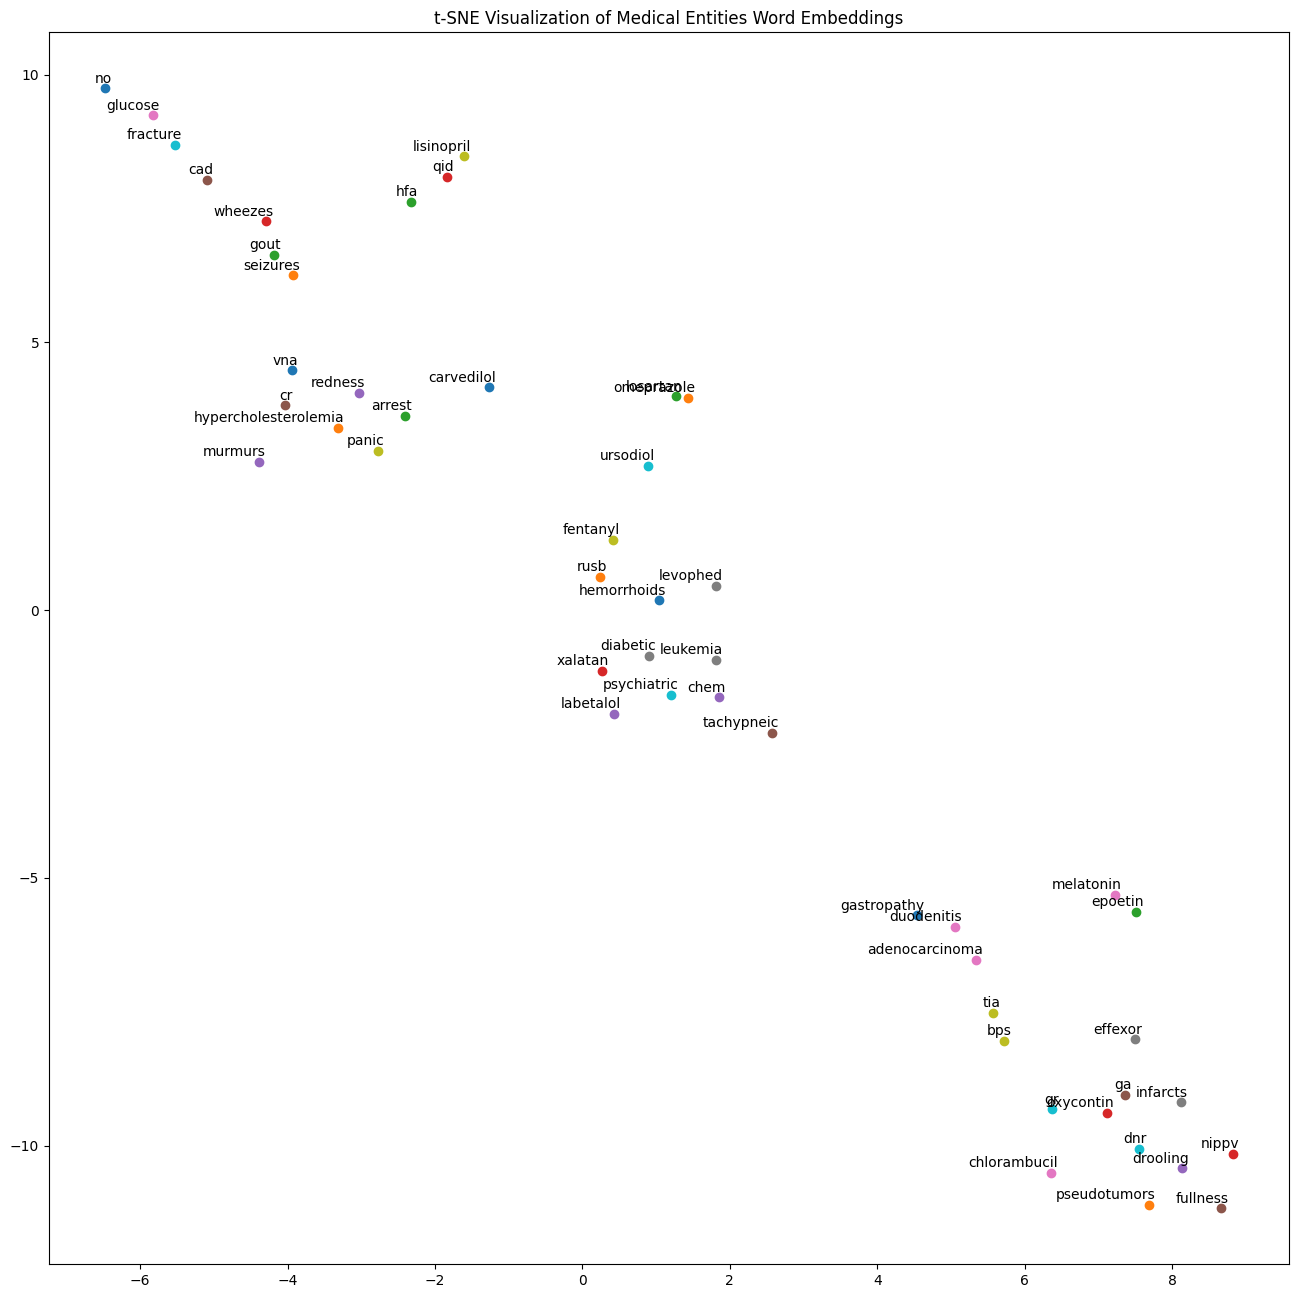


Similar terms analysis:

Terms similar to 'vna':
  - surgery: 0.9957
  - gi: 0.9954
  - at: 0.9945

Terms similar to 'seizures':
  - intact: 0.9984
  - sputum: 0.9982
  - into: 0.9982

Terms similar to 'gout':
  - since: 0.9984
  - general: 0.9982
  - full: 0.9980

Terms similar to 'xalatan':
  - folate: 0.9861
  - other: 0.9861
  - b: 0.9861

Terms similar to 'chem':
  - cirrhosis: 0.9885
  - site: 0.9882
  - full: 0.9881


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import en_ner_bc5cdr_md
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import re
from collections import Counter

# Load the BC5CDR model for medical entity extraction
nlp = en_ner_bc5cdr_md.load()

# Function to preprocess text
def preprocess_text(text):
    # Convert to string if not already
    text = str(text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize
    return text.split()

# Function to extract entities
def extract_entities(text):
    doc = nlp(str(text))
    entities = [ent.text.lower() for ent in doc.ents]
    return entities

# Function for t-SNE plot based on inspiration code
def tsne_plot(model, words):
    """Creates a t-SNE model and plots it"""
    labels = []
    tokens = []

    for word in words:
        if word in model.wv:
            tokens.append(model.wv[word])
            labels.append(word)
        else:
            print(f"Skipping '{word}' as it is not present in the model's vocabulary.")

    if len(tokens) == 0:
        print("No words found in the vocabulary.")
        return
    
    # Configure t-SNE with parameters from inspiration code
    tsne_model = TSNE(perplexity=min(11, len(tokens)-1), 
                      early_exaggeration=12, 
                      n_components=2, 
                      init='pca', 
                      n_iter=1000, 
                      random_state=23)
    
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    
    plt.title("t-SNE Visualization of Medical Entities Word Embeddings")
    plt.savefig('tsne_medical_entities.png')
    plt.show()

# Main processing code
# Assuming df is your dataframe with the 'noteevents_text' column

# Prepare corpus for Word2Vec
all_tokens = []
all_entities = set()

# Process the first 60 rows
print("Processing notes and extracting medical entities...")
for i in range(min(60, len(noteevents_df['TEXT']))):
    text = str(noteevents_df['TEXT'].iloc[i])
    
    # Get all tokens for the note
    tokens = preprocess_text(text)
    all_tokens.append(tokens)
    
    # Extract medical entities
    doc = nlp(text)
    note_entities = [ent.text.lower() for ent in doc.ents]
    
    # Add to our set of all entities
    all_entities.update(note_entities)

print(f"Found {len(all_entities)} unique medical entities in the notes")

# Train Word2Vec model
print("Training Word2Vec model...")
model = Word2Vec(sentences=all_tokens, 
                 vector_size=100,
                 window=5,
                 min_count=1,
                 workers=4)

print(f"Model trained with vocabulary size: {len(model.wv.key_to_index)}")

# Get list of entities that are in the model vocabulary
entities_in_vocab = [entity for entity in all_entities if entity in model.wv]
print(f"Number of medical entities in model vocabulary: {len(entities_in_vocab)}")

if len(entities_in_vocab) > 0:
    # If there are too many entities, limit to a reasonable number
    if len(entities_in_vocab) > 50:
        print(f"Limiting visualization to 50 entities (out of {len(entities_in_vocab)})")
        entities_for_plot = entities_in_vocab[:50]
    else:
        entities_for_plot = entities_in_vocab
    
    # Create t-SNE plot
    print("Creating t-SNE visualization...")
    tsne_plot(model, entities_for_plot)
    
    # Show similar terms for a few entities
    print("\nSimilar terms analysis:")
    for entity in entities_for_plot[:5]:  # Show for first 5 entities
        try:
            print(f"\nTerms similar to '{entity}':")
            similar_terms = model.wv.most_similar(entity, topn=3)
            for term, similarity in similar_terms:
                print(f"  - {term}: {similarity:.4f}")
        except KeyError:
            print(f"  Entity '{entity}' not found in model vocabulary")
else:
    print("No medical entities found in the model vocabulary. Check preprocessing or increase data size.")